Практическая работа №3 Самсоненко Станислав Владимирович ИКБО-01-20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Объяснение столбцов по данным https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

* `age` - Возраст
* `sex` - Пол
* `bmi` - Индекс массы тела
* `children` - Количество детей вписанных в полис
* `smoker` - Курильщик / некурящий
* `region` - Район проживания получателя в США, северо-восток, юго-восток, юго-запад, северо-запад.
* `charges` - Индивидуальные медицинские расходы, оплачиваемые медицинским страхованием.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Выводы по данным:
* Средний возраст выборки - 39 лет, стандартное отклонение - 14 лет
* Средний ИМТ - 30,6
* У застрахованных лиц в среднем 1 ребёнок вписанный в полис
* В среднем, страховка покрывает $13k медицинских расходов со стандартным отклонением $12k
* Минимальный размер покрываемых страховкой медицинских расходов $1,1k, максимальная - $63k

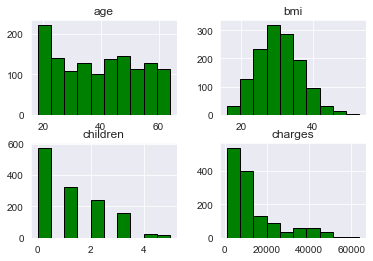

In [6]:
df.hist(color = 'green', edgecolor = 'black')
plt.show()

Выводы по распределениям:
* Распределение по возрастам равномерное, за исключением группы людей возраста 20 лет
* Распределение ИМТ около нормального
* Больше лиц не имеет покрытых страховкой детей/иждивенцев
* Количество страховок обратно пропорционально их стоимости

In [7]:
mean_bmi = df['bmi'].mean()
median_bmi = df['bmi'].median()
mode_bmi = df['bmi'].mode().values[0]

mean_charges = df['charges'].mean()
median_charges = df['charges'].median()
mode_charges = df['charges'].mode().values[0]

# Меры разброса
variance_bmi = df['bmi'].var()
std_dev_bmi = df['bmi'].std()

variance_charges = df['charges'].var()
std_dev_charges = df['charges'].std()

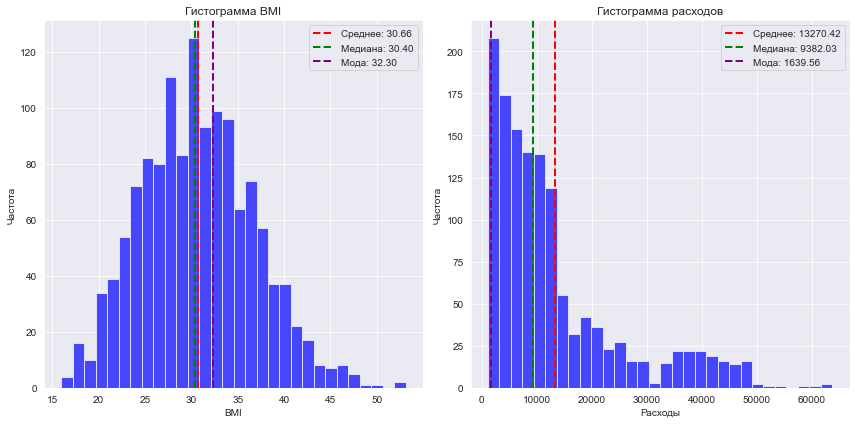

In [8]:
plt.figure(figsize=(12, 6))

# Гистограмма для bmi
plt.subplot(1, 2, 1)
plt.hist(df['bmi'], bins=30, color='blue', alpha=0.7)
plt.axvline(mean_bmi, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_bmi:.2f}')
plt.axvline(median_bmi, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_bmi:.2f}')
plt.axvline(mode_bmi, color='purple', linestyle='dashed', linewidth=2, label=f'Мода: {mode_bmi:.2f}')
plt.title('Гистограмма BMI')
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.legend()

# Гистограмма для charges
plt.subplot(1, 2, 2)
plt.hist(df['charges'], bins=30, color='blue', alpha=0.7)
plt.axvline(mean_charges, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_charges:.2f}')
plt.axvline(median_charges, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_charges:.2f}')
plt.axvline(mode_charges, color='purple', linestyle='dashed', linewidth=2, label=f'Мода: {mode_charges:.2f}')
plt.title('Гистограмма расходов')
plt.xlabel('Расходы')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
print(f'Индекс массы тела (BMI):')
print(f'Среднее значение: {mean_bmi:.2f}')
print(f'Медиана: {median_bmi:.2f}')
print(f'Мода: {mode_bmi:.2f}')
print(f'Дисперсия: {variance_bmi:.2f}')
print(f'Стандартное отклонение: {std_dev_bmi:.2f}')

print('\nРасходы (Charges):')
print(f'Среднее значение: {mean_charges:.2f}')
print(f'Медиана: {median_charges:.2f}')
print(f'Мода: {mode_charges:.2f}')
print(f'Дисперсия: {variance_charges:.2f}')
print(f'Стандартное отклонение: {std_dev_charges:.2f}')

Индекс массы тела (BMI):
Среднее значение: 30.66
Медиана: 30.40
Мода: 32.30
Дисперсия: 37.19
Стандартное отклонение: 6.10

Расходы (Charges):
Среднее значение: 13270.42
Медиана: 9382.03
Мода: 1639.56
Дисперсия: 146652372.15
Стандартное отклонение: 12110.01


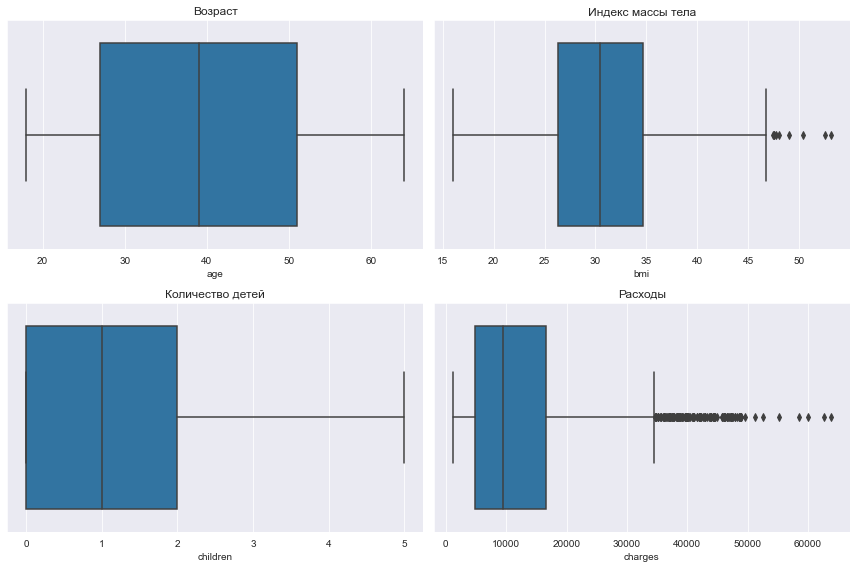

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.boxplot(data=df, x='age', ax=axes[0, 0])
axes[0, 0].set_title('Возраст')

sns.boxplot(data=df, x='bmi', ax=axes[0, 1])
axes[0, 1].set_title('Индекс массы тела')

sns.boxplot(data=df, x='children', ax=axes[1, 0])
axes[1, 0].set_title('Количество детей')

sns.boxplot(data=df, x='charges', ax=axes[1, 1])
axes[1, 1].set_title('Расходы')

plt.tight_layout()
plt.show()



n=5: Среднее = 13353.27, Стандартное отклонение = 4981.89
n=10: Среднее = 13374.31, Стандартное отклонение = 3997.99
n=30: Среднее = 13510.82, Стандартное отклонение = 2185.28
n=50: Среднее = 13320.39, Стандартное отклонение = 1623.56
n=100: Среднее = 13186.86, Стандартное отклонение = 1112.69
n=250: Среднее = 13259.78, Стандартное отклонение = 685.99


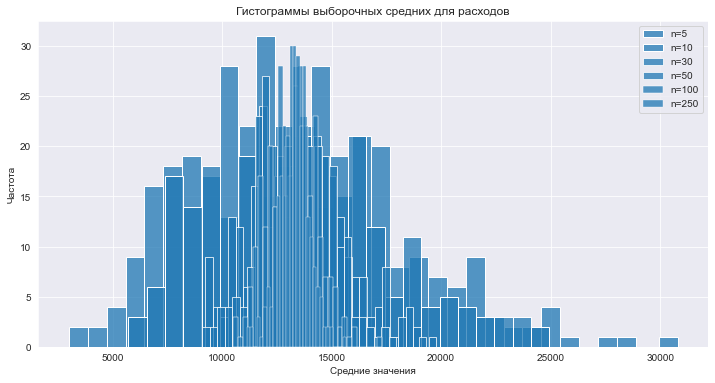

In [11]:
num_samples = 300

# Размеры выборок n
sample_sizes = [5, 10, 30, 50, 100, 250]

# Список для хранения средних значений выборок
sample_means = []

# Генерация выборок и вычисление их средних значений
for n in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = df['charges'].sample(n)
        sample_mean = sample.mean()
        means.append(sample_mean)
    sample_means.append(means)

# Построение гистограмм для выборочных средних
plt.figure(figsize=(12, 6))
for i, n in enumerate(sample_sizes):
    sns.histplot(sample_means[i], bins=30, label=f'n={n}', ax=plt.gca())
plt.title(f'Гистограммы выборочных средних для расходов')
plt.xlabel('Средние значения')
plt.ylabel('Частота')
plt.legend()

# Оценка среднего и стандартного отклонения выборочных средних
for i, n in enumerate(sample_sizes):
    mean_sample = np.mean(sample_means[i])
    std_sample = np.std(sample_means[i])
    print(f'n={n}: Среднее = {mean_sample:.2f}, Стандартное отклонение = {std_sample:.2f}')

plt.show()


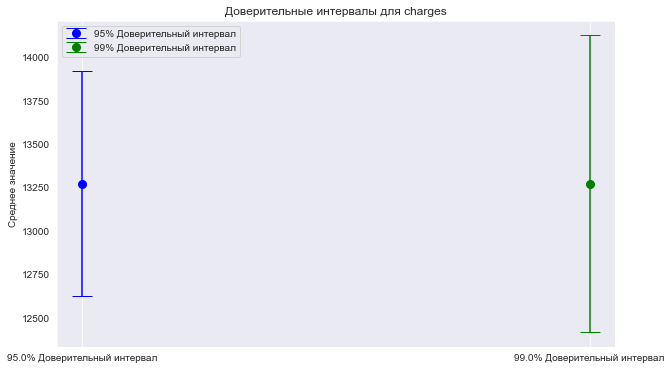

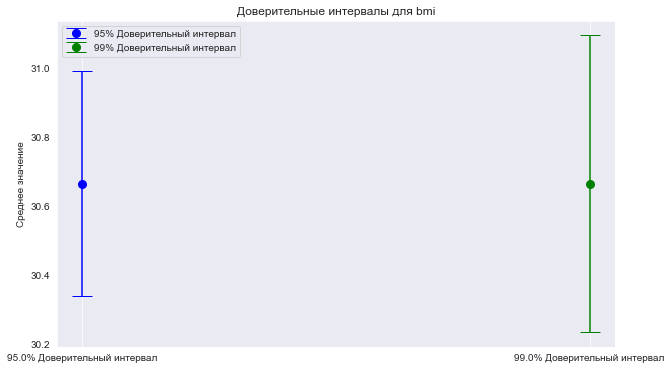

In [12]:
feature_names = ['charges', 'bmi']

# Уровень доверия
confidence_level_95 = 0.95
confidence_level_99 = 0.99
for feature_name in feature_names:
    # Вычисление среднего и стандартного отклонение выбранного признака
    mean_feature = df[feature_name].mean()
    std_feature = df[feature_name].std()

    # Размер выборки
    sample_size = len(df)

    # Вычисление стандартной ошибки среднего
    standard_error = std_feature / np.sqrt(sample_size)

    # Вычисление t-значение для уровня доверия 95% и 99%
    t_value_95 = sts.t.ppf((1 + confidence_level_95) / 2, df=sample_size - 1)
    t_value_99 = sts.t.ppf((1 + confidence_level_99) / 2, df=sample_size - 1)

    # Вычислите доверительные интервалы
    confidence_interval_95 = (mean_feature - t_value_95 * standard_error, mean_feature + t_value_95 * standard_error)
    confidence_interval_99 = (mean_feature - t_value_99 * standard_error, mean_feature + t_value_99 * standard_error)

    # Построение доверительных интервалов
    plt.figure(figsize=(10, 6))
    plt.errorbar(x=[0], y=[mean_feature], yerr=[(confidence_interval_95[1] - mean_feature)], fmt='o', label='95% Доверительный интервал', markersize=8, capsize=10, color='blue')
    plt.errorbar(x=[1], y=[mean_feature], yerr=[(confidence_interval_99[1] - mean_feature)], fmt='o', label='99% Доверительный интервал', markersize=8, capsize=10, color='green')
    plt.xticks([0, 1], [f'{confidence_level_95 * 100}% Доверительный интервал', f'{confidence_level_99 * 100}% Доверительный интервал'])
    plt.title(f'Доверительные интервалы для {feature_name}')
    plt.ylabel('Среднее значение')
    plt.legend()
    plt.grid(axis='y')

    plt.show()


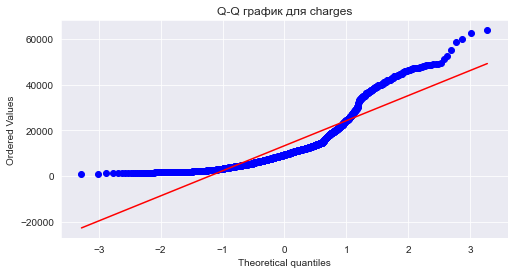

Признак: charges
KS-тест: Статистика = 0.1885, p-значение = 0.0000
4.381949677777384e-42
KS-тест: Отвергаем нулевую гипотезу, распределение не является нормальным.


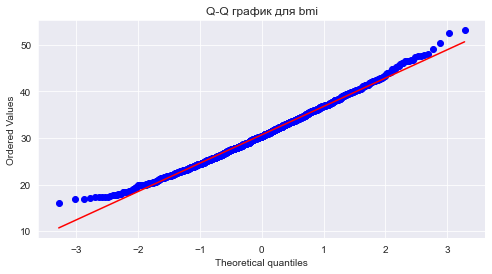

Признак: bmi
KS-тест: Статистика = 0.0261, p-значение = 0.3163
0.3162798242838347
KS-тест: Не отвергаем нулевую гипотезу, распределение является нормальным.


In [13]:
for feature in feature_names:
    data = df[feature]

    # Проведите KS-тест
    ks_statistic, ks_p_value = sts.kstest(data, 'norm', (data.mean(), data.std()))

    # Постройте q-q график
    plt.figure(figsize=(8, 4))
    sts.probplot(data, plot=plt)
    plt.title(f'Q-Q график для {feature}')
    plt.show()

    # Выведите результаты теста и q-q графика
    print(f'Признак: {feature}')
    print(f'KS-тест: Статистика = {ks_statistic:.4f}, p-значение = {ks_p_value:.4f}')
    print(ks_p_value)
    if ks_p_value < 0.05:
        print('KS-тест: Отвергаем нулевую гипотезу, распределение не является нормальным.')
    else:
        print('KS-тест: Не отвергаем нулевую гипотезу, распределение является нормальным.')

In [14]:
data = pd.read_csv('ECDCCases.csv')

In [15]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61904 non-null  object 
 1   day                                                         61904 non-null  int64  
 2   month                                                       61904 non-null  int64  
 3   year                                                        61904 non-null  int64  
 4   cases                                                       61904 non-null  int64  
 5   deaths                                                      61904 non-null  int64  
 6   countriesAndTerritories                                     61904 non-null  object 
 7   geoId                                                       61629 non-null  object 
 

In [17]:
data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.178100e+04,59025.000000
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07,66.316369
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.531246e+08,162.324550
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.561206
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [18]:
data.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [19]:
data.isna().sum().apply(lambda x: x / len(data)).sort_values()

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
continentExp                                                  0.000000
countryterritoryCode                                          0.001987
popData2019                                                   0.001987
geoId                                                         0.004442
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0.046507
dtype: float64

In [20]:
data = data.drop(['geoId', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis = 1)

In [21]:
data['countryterritoryCode'] = data['countryterritoryCode'].fillna('others')

In [22]:
data['popData2019'] = data['popData2019'].fillna(np.mean(data.popData2019))

In [23]:
data.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

In [24]:
data.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529724e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.813207e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.860872e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [25]:
data[data['deaths'] > 3000].groupby(by=['countriesAndTerritories']).size()

countriesAndTerritories
Argentina                   1
Ecuador                     1
Mexico                      1
Peru                        2
United_States_of_America    6
dtype: int64

In [26]:
data[data.duplicated()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [27]:
data = data.drop_duplicates()

In [28]:
data = pd.read_csv('bmi.csv')
data.head()

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     650 non-null    float64
 1   region  650 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.3+ KB


In [30]:
regions_samples = {}
for region in ('northwest', 'southwest'):
    region_sample = data[data['region'] == region]
    regions_samples[region] = region_sample['bmi']


In [31]:
for region, sample in regions_samples.items():
    print(f'testing distribution normality: {region}')
    shapiro = sts.shapiro(sample)
    print(f' shapiro test p-value {shapiro.pvalue}')
    if shapiro.pvalue > 0.05:
        print(' sample has normal distribution')
    else:
        print(' sample has not normal distribution')

testing distribution normality: northwest
 shapiro test p-value 0.46545225381851196
 sample has normal distribution
testing distribution normality: southwest
 shapiro test p-value 0.3630009591579437
 sample has normal distribution


In [32]:
# И на гомогенность дисперсии (критерий Бартлетта).
print('testing sample dispersion equality')
bartlett = sts.bartlett(regions_samples['northwest'], regions_samples['southwest'])
print(f' bartlett test p-value {bartlett.pvalue}')
if bartlett.pvalue > 0.05:
    print(f' samples belong to one general population')
else:
    print(f' samples belong to different general populations')

testing sample dispersion equality
 bartlett test p-value 0.06519347353580048
 samples belong to one general population


In [33]:
print('testing statstic difference between two samples')
t_test = sts.ttest_ind(regions_samples['northwest'], regions_samples['southwest'])
print(f' t-test p-value: {t_test.pvalue}')
if t_test.pvalue > 0.05:
    print(f' there is not statistic difference between mens of two samples')
else:
    print(f' there is statistic difference between mens of two samples')

testing statstic difference between two samples
 t-test p-value: 0.001076958496307695
 there is statistic difference between mens of two samples


In [34]:
data = pd.DataFrame({
    'dice': [1, 2, 3, 4, 5, 6],
    'n': [97, 98, 109, 95, 97, 104],
})
data

,dice,n
0,1,97
1,2,98
2,3,109
3,4,95
4,5,97
5,6,104


In [35]:
data['expected'] = pd.Series([sum(data['n']) // len(data['n']) for _ in range(len(data['n']))])
data

,dice,n,expected
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


In [36]:
# С помощью критерия Хи-квадрат проверить,
# является ли полученное распределение равномерным.
# Использовать функцию scipy.stats.chisquare()
print('testing equality observed and expected distributions')
chi2 = sts.chisquare(data['n'], data['expected'])
print(f' chi-square p-value: {chi2.pvalue}')
if chi2.pvalue > 0.05:
    print(' observed distribution is equal to linear distribution')
else:
    print(' observed distribution is not equal to linear distribution')

testing equality observed and expected distributions
 chi-square p-value: 0.9198882077437889
 observed distribution is equal to linear distribution


In [37]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']


In [38]:
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [39]:
# С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
# Использовать функцию scipy.stats.chi2_contingency().
# Влияет ли семейное положение на занятость?
print('testing influence of a categorical feature on the distribution')
chi2 = sts.chi2_contingency(data)
print(f' chi-square p-value: {chi2[1]}')
if chi2[1] < 0.05:
    print(' categorical attribute has an influence on the distribution')
else:
    print(' categorical attribute has not an influence on the distribution')


testing influence of a categorical feature on the distribution
 chi-square p-value: 1.7291616900960234e-21
 categorical attribute has an influence on the distribution
